In [99]:
import pandas as pd
import json
import numpy as np
import geopandas as gpd
from operator import itemgetter
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
#data = pd.read_excel("UBERMOVEMENT-01-January-2016.xlsx")

In [33]:
data_2 = pd.read_csv("manila-hexes-2017-3-All-HourlyAggregate.csv")

In [357]:
lengths = []
for hour in range(24):
    lengths.append(len(data_2[data_2['hod']==hour]))

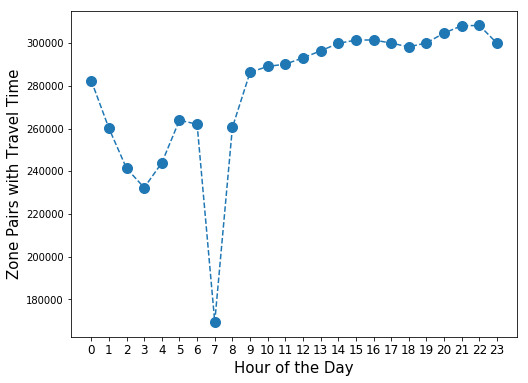

In [423]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(24),lengths,'o--',markersize=10)
plt.xticks(np.arange(0,24,1), fontsize=12)
plt.xlabel("Hour of the Day", fontsize=15)
plt.ylabel("Zone Pairs with Travel Time", fontsize=15)
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) 
plt.savefig('LENGTH_MANILA.pdf',bbox_inches='tight',dpi=1000)

In [10]:
x = np.arange(24)

max_ =(x[lengths.index(max(lengths))])
min_ = (x[lengths.index(min(lengths))])
print(max_,min_)

22 7


In [37]:
hour = 22

In [38]:
data_ = data_2[data_2['hod']==hour]

In [39]:
data_.head(5)

sourceid  dstid  hod  mean_travel_time  standard_deviation_travel_time  \
291        29     79   22           1358.29                          588.03   
294        29     97   22           1720.00                          989.44   
508         8    379   22           1184.79                          372.80   
509        51      9   22           3157.67                          663.51   
510         6    399   22           3453.67                          639.13   

     geometric_mean_travel_time  geometric_standard_deviation_travel_time  
291                     1280.78                                      1.36  
294                     1493.15                                      1.67  
508                     1133.94                                      1.34  
509                     3088.30                                      1.24  
510                     3396.60                                      1.20

In [40]:
datax = data_2[data_2['hod']==hour]

In [41]:
len(datax[datax['sourceid']==475])

590

In [42]:
uber_ = json.loads(open('manila_hexes.json').read())
tobecleaned=dict(uber_)
places=[x['properties']['DISPLAY_NAME'] for x in tobecleaned['features']]
id_numbers=[int(x['properties']['MOVEMENT_ID']) for x in tobecleaned['features']]

#Remove 'Philippines'
philindex = places.index('Philippines')
id_numbers.remove(philindex+1)
places.remove('Philippines')

cities = {}
#Obtain frequency of cities/municipalities
for place in places:
    place=[x.strip() for x in place.split(',')] #Take place string and split by comma
    if place[-1] in cities.keys():
        cities[place[-1]]+=1
        #print(split_display[-1])
    else:
        cities[place[-1]]=1
        
#Clean cities dictionary
for key,value in cities.items():
    if key=='Lungsod Quezon':
        cities['Quezon City']+=value
    if key=='Maynila':
        cities['Manila']+=value
    if key=='Lungsod ng San Juan':
        cities['San Juan']+=value
cities.pop("Lungsod Quezon")
cities.pop("Maynila")
cities.pop("Lungsod ng San Juan")

cities__=sorted(list(cities.keys())) #Sort cities


#Match location with originID
loc = []
z=0
for index,place in enumerate(places):
    place=[x.strip() for x in place.split(',')] #Split place by commas

    if place[-1] in cities.keys(): #Check if last element in place is in city keys
        loc.append(cities__.index(place[-1]))
        #print(place[-1],cities__.index(place[-1]))
    elif place[-1]=='Lungsod Quezon' :
        loc.append(cities__.index('Quezon City'))
        #print(place[-1],cities__.index('Quezon City'))
    elif place[-1]=='Maynila':
        loc.append(cities__.index('Manila'))
        #print(place[-1],cities__.index('Manila'))
    elif place[-1]=='Lungsod ng San Juan':
        loc.append(cities__.index('San Juan'))
        #print(place[-1],cities__.index('San Juan'))
    z+=1
loc = np.array(loc)

ids = [i for i in range(len(loc))]
idloc_pair= [(id,locs,places,orig_id) for id,locs,places,orig_id in zip(ids,loc,places,id_numbers)] #contains new ID,location as city index, place as address and original ID
idloc_pair_sorted = sorted(idloc_pair,key=itemgetter(1))  #Sorted according to city index


        
import geopandas as gpd
uber = gpd.GeoDataFrame.from_file("manila_hexes.shp")
metro_manila = gpd.read_file("Metro_Manila_AL6.GeoJson")
uber.drop(uber.index[1])

MOVEMENT_I                                         DISPLAY_NA  \
0            1                        Unnamed Road, Tondo, Manila   
2            3                        Unnamed Road, Tondo, Manila   
3            4            Miguel de Legaspi Street, Tondo, Manila   
4            5            300 Younger Street, 132 Zone 11, Manila   
5            6                  100 Pag-asa Street, Tondo, Manila   
6            7                    Taysan Road, Santa Cruz, Manila   
7            8        0 A. Bonifacio Avenue, La Loma, Quezon City   
8            9                     100 Sct M Alcaraz, Quezon City   
9           10    0 Caragay, San Francisco del Monte, Quezon City   
10          11                            0 Times, Lungsod Quezon   
11          12                   Mayaman, Diliman, Lungsod Quezon   
12          13               Regidor Street, Diliman, Quezon City   
13          14                          Lacewing Street, Marikina   
14          15                                     Road, Marikina   
15          16                                  0 Agnes, Marikina   
16          17                                0 Redwood, Marikina   
17          18                                0 Ditchoy, Marikina   
18          19                                  100 Hawaii, Pasig   
19          20                               4400 Guyabano, Pasig   
20          21                                 0 Melbourne, Pasig   
21          22                            0 West Bank Road, Pasig   
22          23                        Mercedes Park Street, Pasig   
23          24                        Morning Glory Street, Pasig   
24          25                             Napindan Bridge, Pasig   
25          26                     Circumferential Road 6, Taguig   
26          27                           Meadowlark Drive, Taguig   
27          28  300 Circumferential Road 6, Lower Bicutan, Taguig   
28          29         0 Pagkakaisa Street, Lower Bicutan, Taguig   
29          30                          Kasarinlan Street, Taguig   
30          31                                      Rosal, Manila   
..         ...                                                ...   
816        817                      River Banks Walkway, Marikina   
817        818                    0 A. Bonifacio Avenue, Marikina   
818        819                  200 Katipunan Avenue, Quezon City   
819        820                    100 B. Gonzales, Lungsod Quezon   
820        821          200 Mapagkumbaba, Diliman, Lungsod Quezon   
821        822             100 Maginhawa, Diliman, Lungsod Quezon   
822        823                        0 A Mabini Street, Marikina   
823        824                            100 Princeton, Marikina   
824        825                             0 Saint Anne, Marikina   
825        826               0 Don Gonzalo Puyat Street, Marikina   
826        827                Father Masterson Drive, Quezon City   
827        828                  300 Katipunan Avenue, Quezon City   
828        829       100 Purok Aguinaldo, Diliman, Lungsod Quezon   
829        830              D. Castaneda, Diliman, Lungsod Quezon   
830        831                 100 East dela Paz Street, Marikina   
831        832                  0 General Malvar Street, Marikina   
832        833                     0 Lopez Jaena Street, Marikina   
833        834               0 Don Gonzalo Puyat Street, Marikina   
834        835                Father Masterson Drive, Quezon City   
835        836                         Ibanag Street, Quezon City   
836        837                               0 Sumulong, Marikina   
837        838                   400 J. P. Rizal Street, Marikina   
838        839                       Puerto Rico Street, Marikina   
839        840                               Tausing, Quezon City   
840        841                         Ifugao Street, Quezon City   
841        842               400 Shoe Avenue, Sto. Nino, Marikina   
84

In [19]:
uber['area']=uber['geometry'].area

In [22]:
uber['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area / 10**6)

0      0.335161
1      0.335166
2      0.335201
3      0.335206
4      0.335282
5      0.335309
6      0.335386
7      0.335413
8      0.335490
9      0.335517
10     0.335621
11     0.335724
12     0.335828
13     0.335931
14     0.335980
15     0.335976
16     0.335986
17     0.335982
18     0.335977
19     0.335987
20     0.335983
21     0.335992
22     0.335988
23     0.335993
24     0.335989
25     0.335976
26     0.335945
27     0.335801
28     0.335751
29     0.335702
         ...   
816    0.335887
817    0.335864
818    0.335842
819    0.335819
820    0.335796
821    0.335774
822    0.335959
823    0.335936
824    0.335914
825    0.335891
826    0.335869
827    0.335846
828    0.335823
829    0.335801
830    0.335963
831    0.335941
832    0.335918
833    0.335895
834    0.335873
835    0.335850
836    0.335968
837    0.335945
838    0.335922
839    0.335900
840    0.335877
841    0.335972
842    0.335949
843    0.335927
844    0.335904
845    0.335954
Name: geometry, Length: 

In [167]:

def getCentrality(hour,kind):
    #datax = am_rush
    datax = data_2[data_2['hod']==hour]
    Score= []
    
    datax[datax['sourceid']==475]
    for i in range(1,847):
        if kind.lower() == 'out':
            origin = datax[datax['sourceid']==i] #OUTDEGREE
        elif kind.lower() == 'in':
            origin = datax[datax['dstid']==i] #IN DEGREE
        #destinations = origin['Destination'] #pandas data series
        Score.append(len(origin)) #get number of destinations from current origin
    
    
    #Remove 'Philippines' score and from places
    Score.remove(Score[philindex])
    
    
    #Convert back to arraY
    Score= np.array(Score)
            
    #Get Score or Centrality
    def getScore(city): #Per City
        origins_in_city=[]

        #Obtain origins that belong to the city
        for i in idloc_pair:
            if i[1]==cities__.index(city):
                origins_in_city.append(i) 
                
        x=[x[0] for x in origins_in_city]

        address = [ s[2] for s in origins_in_city]
        orig_id = [ s[3] for s in origins_in_city]

        y=np.array([Score[t] for t in x])/762 #Corresponding normalized score from origins in city (normalized by dividing over total number of origins)
      



        xyadd=[(x,y,z,orig) for x,y,z,orig in zip(x,y,address,orig_id)] #origins ids in the city, score, and the address
        #print(xyadd)
        xyadd = sorted(xyadd,key=itemgetter(1),reverse=True) #DESCENDING ORDER SORTING BASED ON SCORE
        #print(xyadd)
        
        #print(len(xyadd))
        #convert x into 1 -> len(x) and convert to percentages

        x= [(i)/(len(xyadd)-1) for i in range(len(xyadd))]
        #print(x)
        xyadd = [(x,y[1],y[2],y[3]) for x,y in zip(x,xyadd)] #normalized origin ids in the city, score and the address
        #print(timebucket)
        #print(xyadd)
        #print("end")

        ### OPTIMIZE AND MAKE IT USER-FRIENDLY BY USING DICTIONARIES??? ###

        return xyadd
    x_and_scores = []
    for i in cities__:
        x_and_scores.append(getScore(i))
    x_and_scores = np.array(x_and_scores)
    return x_and_scores

In [161]:
def pre_plot_map(hour,kind):
    
    allscores=[]
    allscores.append(getCentrality(hour,kind))
    
    allscores_new = []

    for tb in allscores:
        maxx=[]
        for i in tb:
            maxx.append(max(i,key=itemgetter(1))[1])
        new = [[scores,maxscore,cityindex] for scores,maxscore,cityindex in zip(tb,maxx,[i for i in range(len(cities))])]
        new = sorted(new,key=itemgetter(1),reverse=True)
        allscores_new.append(new)
    #This will contain the ordered list of cities based on maximum cwentrality
    cities_ordered = []
 

    
    move_ids = [z for city_info in allscores_new[0][:] for w,x,y,z in  city_info[0]]
    
    import operator 
    for day in allscores_new[0]: #let's try 'ALL_DAY' first. We can just remove the '[0]' if we want to see how the maximum zones change
        zone_info= max(day[0], key=lambda x:x[1]) #We will only be getting index 0 since we need the element that contains the address
        zone_address= zone_info[2]
        zone_centrality=zone_info[1]
        zone_city = cities__[day[2]] # day[2] gives us the index of the city based on the cities__ array
        #print("[",zone_city,"]",zone_address,"has the highest centrality with value of:",zone_centrality)
        cities_ordered.append(zone_city)
    return allscores_new, cities_ordered , allscores

### LOAD ROADS LAYER

In [45]:
#https://mapcruzin.com/free-philippines-country-city-place-gis-shapefiles.htm
roads = gpd.GeoDataFrame.from_file("roads.shp")

In [46]:
roads = roads[(roads['type'].isin(['primary','trunk','secondary']))]

In [47]:
roads.head(5)

osm_id              name   ref       type  oneway  bridge  tunnel  \
2  2667097       Taft Avenue  None    primary       1       0       0   
3  2667099             Lerma  None      trunk       1       0       1   
5  2667111  Quezon Boulevard  None    primary       1       0       0   
6  2667112     F.B. Harrison  None  secondary       0       0       0   
7  2667489      DoÃ±a Hemady  None  secondary       1       0       0   

   maxspeed                                           geometry  
2      80.0  LINESTRING (120.9971986 14.5541397, 120.997128...  
3       NaN  LINESTRING (120.9854161 14.604594, 120.9855136...  
5       NaN  LINESTRING (120.9805178 14.5944743, 120.980816...  
6       NaN  LINESTRING (120.9894964 14.5602116, 120.989681...  
7       NaN  LINESTRING (121.0383377 14.6127476, 121.037877...

In [368]:
def plot_map(kind):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    test=0
    #plot centrality 
    #Obtain ['ALL_DAY'][city_info (2 other values: 1-max centralities of cities, 2-sorted indices)]
    for city_info in allscores_new[0][:]:
        for _,score,address,move_id in city_info[0]:
            uber.loc[uber.MOVEMENT_I == str(move_id), '{}_Centrality'.format(kind)] = score
            city_in_DISPLAY_NA = [x.strip() for x in address.split(',')][-1] #Take place string and split by comma

        #         target_city = 'Pasig'
        #         if city_in_DISPLAY_NA!=target_city: #Don't give centrality to zones out of Pasay
        #             uber.loc[uber.MOVEMENT_I == str(move_id), 'Centrality'] = 0 
        #         if city_in_DISPLAY_NA==target_city:
        #             uber.loc[uber.MOVEMENT_I == str(move_id), 'Centrality'] = 0.255
                    #print(address)
        #     ax = uber.plot(figsize=(10,10),column='Centrality',alpha=1,cmap='BuPu',zorder=1)
        #     metro_manila.plot(ax=ax,color='white',alpha=0.2,edgecolor='black', linewidth=2,zorder=3)
        #     edges[plot_edges].plot(ax=ax, zorder=2,alpha=0.5,linewidth=3,color="yellow")

    vmin, vmax = 0, 1
        #vmin, vmax = 0, 0.255
        
    #ADD HEXES LAYER
    ax = uber.plot(figsize=(8.5,8.5),column='{}_Centrality'.format(kind), cmap='gist_heat_r', vmin=vmin, vmax=vmax,zorder=1)
    #plt.title("Centrality")

    #ADD METRO MANILA SHAPEFILES LAYER
    metro_manila.plot(ax=ax,color='white',alpha=0.2,edgecolor='black', linewidth=1,zorder=3)

    roads.plot(ax=ax,color='cyan',alpha=0.75,edgecolor='black', linewidth=0.5,zorder=2)
    #ADD ROADS LAYER
    #edges[plot_edges].plot(ax=ax, zorder=2,alpha=0.5,linewidth=1,color="blue")

    #plt.title('Metro Manila')
    #SET XLIM AND YLIM OF MAP
    #plt.title('Metro Manila Centrality Map [Hour: {}]'.format(hour),fontsize=20)
    plt.xlim(120.9355,121.125)
    plt.ylim(14.475,14.65)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    #PLACE COLORBAR
    fig = ax.get_figure()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap='gist_heat_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # fake up the array of the scalar mappable.
    sm._A = []
    fig.colorbar(sm, cax=cax)
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) 
    plt.savefig('{}_DEGREE_MANILA_MAP_hour_{}.pdf'.format(kind,hour),bbox_inches='tight',dpi=1000)
    #plt.savefig("OUT_DEGREE_MANILA_MAP.png")



#uber['Centrality']= 0 

    #reference:
    #https://stackoverflow.com/questions/36008648/colorbar-on-geopandas  

### CORRECT ZONE ADDRESSES

In [214]:
def cleaner():
    global uber
    global cities_ordered
        #This doesn't change whatever dataset we're using because we're using movement id's which are permanent.
    #This includes misplaced zones that belong to other cities and zones that belong to the sea. 
    manila_transfer =[529, 308, 439, 462, 591, 590, 621, 332, 365, 363, 266, 300, 299, 428, 201, 171, 202, 237, 457, 614, 560, 31, 51, 77, 32, 108, 263, 91, 151, 692, 766, 671, 495, 1, 45, 46, 168, 169, 193, 194, 195, 196, 221, 222, 223, 224, 225, 226, 250, 251, 252, 253, 254, 255, 256, 257, 258, 386, 387, 420, 285, 286, 284]
    for manila_index, place in enumerate(allscores_new[0][cities_ordered.index('Manila')][0]):
        _,score,address,move_id = place
        if move_id in [591,590,621]: #To Mandaluyong
            allscores_new[0][cities_ordered.index('Mandaluyong')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])
        elif move_id in [614,560]: #To Pasig
            allscores_new[0][cities_ordered.index('Pasig')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])
        elif move_id in [671]: #To San Juan
            allscores_new[0][cities_ordered.index('San Juan')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])
        elif move_id in [692,766]: #To QC
            allscores_new[0][cities_ordered.index('Quezon City')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])
        elif move_id in [529,308,439,462]: #To Makati
            allscores_new[0][cities_ordered.index('Makati')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])
        elif move_id in [31,51,77,32,108,91]: #To Paranaque
            allscores_new[0][cities_ordered.index('Parañaque')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])
        elif move_id in [151]: #To Pasay
            allscores_new[0][cities_ordered.index('Pasay')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])   
        elif move_id in [332,365,363,266,300,299,428,201,171,202,237,457,263]: #To Taguig
            allscores_new[0][cities_ordered.index('Taguig')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index])  
        elif move_id in [495]: #To Pateros
            allscores_new[0][cities_ordered.index('Pateros')][0].append(allscores_new[0][cities_ordered.index('Manila')][0][manila_index]) 

    #Update Manila data  #Check if its move id belongs to manila_transfer
    allscores_new[0][cities_ordered.index('Manila')][0] = [place for manila_index,place in enumerate(allscores_new[0][cities_ordered.index('Manila')][0]) if place[-1] not in (manila_transfer)] 
    
    paranaque_transfer = [157, 38, 39, 40, 41, 48, 49, 53, 64, 73, 74, 75, 86] #This includes misplaced zones that belong to other cities and zones that belong to the sea. 
    for paranaque_index, place in enumerate(allscores_new[0][cities_ordered.index('Parañaque')][0]): #We cannot put append and delete in the same 
        _,score,address,move_id = place

        if move_id in [157]: #To Pasay
            allscores_new[0][cities_ordered.index('Pasay')][0].append(allscores_new[0][cities_ordered.index('Parañaque')][0][paranaque_index])   

    allscores_new[0][cities_ordered.index('Parañaque')][0] = [place for paranaque_index,place in enumerate(allscores_new[0][cities_ordered.index('Parañaque')][0]) if place[-1] not in (paranaque_transfer)]
    taguig_transfer = [399, 429, 554, 26, 27, 28, 197, 227, 228, 259, 260, 291, 292, 293, 421, 487, 198, 229]
    for taguig_index,place in enumerate(allscores_new[0][cities_ordered.index('Taguig')][0]): #We cannot put append and delete in the same 
        _,score,address,move_id = place
        if move_id in [554]: #To Pasig
            allscores_new[0][cities_ordered.index('Pasig')][0].append(allscores_new[0][cities_ordered.index('Taguig')][0][taguig_index])
        elif move_id in [399,429]: #To Makati
            allscores_new[0][cities_ordered.index('Makati')][0].append(allscores_new[0][cities_ordered.index('Taguig')][0][taguig_index])


    allscores_new[0][cities_ordered.index('Taguig')][0] = [place for taguig_index,place in enumerate(allscores_new[0][cities_ordered.index('Taguig')][0]) if place[-1] not in (taguig_transfer)]
    pasig_transfer = [526, 659, 22, 23]
    for pasig_index,place in enumerate(allscores_new[0][cities_ordered.index('Pasig')][0]): #We cannot put append and delete in the same 
        _,score,address,move_id = place
        if move_id in [526]: #To Pateros
            allscores_new[0][cities_ordered.index('Pateros')][0].append(allscores_new[0][cities_ordered.index('Pasig')][0][pasig_index])
        elif move_id in [659,22,23]: #To Cainta
            allscores_new[0][cities_ordered.index('Cainta')][0].append(allscores_new[0][cities_ordered.index('Pasig')][0][pasig_index])


    allscores_new[0][cities_ordered.index('Pasig')][0] = [place for pasig_index,place in enumerate(allscores_new[0][cities_ordered.index('Pasig')][0]) if place[-1] not in (pasig_transfer)]
    sanjuan_transfer = [627]

    for sanjuan_index,place in enumerate(allscores_new[0][cities_ordered.index('San Juan')][0]): #We cannot put append and delete in the same 
        _,score,address,move_id = place
        if move_id in [627]: #To QC
            allscores_new[0][cities_ordered.index('Quezon City')][0].append(allscores_new[0][cities_ordered.index('San Juan')][0][sanjuan_index])


    allscores_new[0][cities_ordered.index('San Juan')][0] = [place for sanjuan_index,place in enumerate(allscores_new[0][cities_ordered.index('San Juan')][0]) if place[-1] not in (sanjuan_transfer)]
    
    #these zones have already been removed
    manila_sea = [142,146,147,149,150,152,153,154,155,157,158,159,160,161,162,165,166,167,168,169,170,171,172,173,192,193,197,176,177,175]
    paranaque_sea = [46,47,48,49,50,51,52,58,62,63,64,66]
    taguig_sea = [57,58,59,63,69,70,75,76,78,79,80,95,103,64,71]



    #Remove sea zones from Pasay|
    pasay_sea = [42, 43, 44, 87, 88, 89, 103, 104, 105, 121, 122, 123, 124, 141, 142, 143, 144, 145, 164, 165, 166, 167, 191, 192, 219, 220]
    allscores_new[0][cities_ordered.index('Pasay')][0] = [place for pasay_index,place in enumerate(allscores_new[0][cities_ordered.index('Pasay')][0]) if place[-1] not in (pasay_sea)]

    ## Now update the normalization factor to 845-83=780 and redo the centrality calculation
    #print(len(manila_sea)+len(pasay_sea)+len(paranaque_sea)+len(taguig_sea))
    print(cities_ordered)
    move_ids = [z for city_info in allscores_new[0][:] for w,x,y,z in  city_info[0]]
    filtered = uber.loc[uber['MOVEMENT_I'].isin(np.array(move_ids).astype(str))]
    
    uber = filtered
    cities_fordataframe = []
    for index,city_info in enumerate(allscores_new[0][:]):
        for values in city_info[0]:
            cities_fordataframe
            w,x,y,z = values
            cities_fordataframe.append(cities_ordered[index])
    move_city = []
    for values in uber.MOVEMENT_I.values:
        move_city.append(cities_fordataframe[move_ids.index(int(values))])
    uber['city'] = move_city

In [215]:
cleaner()

['Makati', 'Pasay', 'Taguig', 'Mandaluyong', 'Manila', 'Parañaque', 'Quezon City', 'Pasig', 'San Juan', 'Marikina', 'Pateros', 'Cainta']


In [216]:
def ccdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n= len(data)

    # x-data for the CCDF: x
    x = np.sort(data)

    # y-data for the CCDF: y
    y = (1- (np.linspace(0, n, n) / n))*100 #multiply 100 to obtain percentage
    
    # y-data for ECDF: y
    #y = (np.arange(1, n+1) / n)
    return x, y

In [217]:
def prep_ccdf(kind):
    for index,value in enumerate(allscores_new[:1][0]):
        #value contains [[tuples of zone info],max,city]
        zone_with_max= max(value[0],key=itemgetter(1)) #get max centrality of the city info tuples 
        max_of_city = zone_with_max[1] 

        #Update city max just in case it has changed
        value[1] = max_of_city

        value[0] = sorted(value[0],key=itemgetter(1),reverse=True) #DESCENDING ORDER SORTING BASED ON SCORE

    allscores_new[:1][0] = sorted(allscores_new[:1][0],key=itemgetter(1))
    
    for index,city_data in enumerate(allscores_new[:1][0]):
    #Create 0 to 1 values based on length of city_data[0] (contains data of all zones in city) ; city_data[1] contains the max centrality in the city
        x= [(i)/(len(city_data[0])-1) for i in range(len(city_data[0]))]
    
    for index_2, new_x in enumerate(x):
        #Update every zone's x with new x
        city_data[0][index_2] = [info for info in city_data[0][index_2]]
        city_data[0][index_2][0] = new_x
        #print(new_x)
        
    #Get max per city and then sort graphs based on this (for all_day -> allscores[0]) 
    maxscores=[]
    for i in allscores[0]:
        maxscores.append(max(i,key=itemgetter(1))[1]) #itemgetter(1) mean get max of tuple based on element 1. [1] means to get element 1 of result.
    all_day = [(scores,maxscore,cityindex) for scores,maxscore,cityindex in zip(allscores[0],maxscores,[i for i in range(len(cities))])]

    all_day = sorted(all_day,key=itemgetter(1),reverse=True) #DESCENDING ORDER BASED ON CITY'S MAX SCORE
    #all_day[0]

    #Get sorted indices from "ALL DAY" which is the first element of allscores_new and the third element of the tuple of each element.
    sortedcityindices = [index for scores,maxscore,index in allscores_new[:1][0]] 
    
    
    #### SORT DATA FOR CCDF BASED ON MEDIAN
    medians = []
    for i in range(len(allscores_new[0])):
        cents = [x for w,x,y,z in allscores_new[0][i][0]]
        median = np.median(cents)

        medians.append(median)

    paired = list(zip(sortedcityindices,medians))
    paired = sorted(paired,key=itemgetter(1),reverse=True)
    sortedcityindices_median = [x for x,y in paired]
    #print(sortedcityindices_median)
    ccdf_data = []
    for index in sortedcityindices_median:
        for i in range(len(allscores_new[0])):
            if allscores_new[0][i][2] == index:
                cents = [x for w,x,y,z in allscores_new[0][i][0]]
                ccdf_data.append(cents)
    new= []
    if hour==7:
        order = sortedcityindices_median
    elif hour==22:
        if kind=='in':
            order = in_order
        elif kind=='out':
            order= out_order
            
    for num in order:
        for i in range(len(allscores_new[0])):
            if allscores_new[0][i][2] == num:
                #print(allscores_new[0][i][2])
                cents = [x for w,x,y,z in allscores_new[0][i][0]]
                new.append(cents)
    ccdf_data = new
    #return sortedcityindices_median,ccdf_data
    return order, ccdf_data

In [421]:
from matplotlib.ticker import StrMethodFormatter
def plot_ccdf():
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(0,1,100),[50 for i in range(100)],linestyle='--',color='black')
    if hour == 7:
        plt.plot([0.5 for i in range(100)],np.linspace(-5,100,100),linestyle='--',color='black')
    else: 
        plt.plot([0.8 for i in range(100)],np.linspace(-5,100,100),linestyle='--',color='black')
    for index,value in enumerate(sortedcityindices_median):
        # Compute ECDF for versicolor data: x_vers, y_vers
        x_vers, y_vers = ccdf(ccdf_data[index])
        if index<len(sortedcityindices_median)/2:
            if cities__[value].upper() == 'MAKATI':
                plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C0',label=cities__[value].upper())
            elif cities__[value].upper() == 'PASAY':
                plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C1',label=cities__[value].upper())
            elif cities__[value].upper() == 'SAN JUAN':
                plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C2',label=cities__[value].upper())
            elif cities__[value].upper() == 'MANDALUYONG':
                plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C3',label=cities__[value].upper())
            elif cities__[value].upper() == 'QUEZON CITY':
                plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C4',label=cities__[value].upper())
            elif cities__[value].upper() == 'MANILA':
                plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C5',label=cities__[value].upper())
        else:
            if cities__[value].upper() == 'PASIG':
                plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C6',label=cities__[value].upper())
            elif cities__[value].upper() == 'MARIKINA':
                plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C7',label=cities__[value].upper())
            elif cities__[value].upper() == 'PARAÑAQUE':
                plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C8',label=cities__[value].upper())
            elif cities__[value].upper() == 'PATEROS':
                plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C9',label=cities__[value].upper())
            elif cities__[value].upper() == 'CAINTA':
                plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C0',label=cities__[value].upper())
            elif cities__[value].upper() == 'TAGUIG':
                plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C1',label=cities__[value].upper())
        # Generate plot
    


    # Make the margins nice
    plt.margins(0.03)
    #plt.plot(np.linspace(0,0.45,100),[25 for i in range(100)],linestyle='',color='black')
    #plt.plot([0.25 for i in range(100)],np.linspace(-5,100,100),linestyle='',color='black')
    #labels = ['0%','20%','40%','60%','80%','100%']

    #plt.yticks(y, labels, rotation='vertical')
    # Label the axes
    # Label the axes
    
    if kind == 'in':
        plt.ylabel('CCDF($d^{in}$)',fontsize=15)
        plt.xlabel("Centrality ($d^{in}$)",fontsize=15)
    else:
        plt.ylabel('CCDF($d^{out}$)',fontsize=15)
        plt.xlabel("Centrality ($d^{out}$)",fontsize=15)
    if hour == 7:
        plt.legend(fontsize=12,ncol=1)
    elif hour == 22:
        plt.legend(fontsize=8,ncol=1)
    #set xtick and y tick fontsize
    plt.yticks(np.arange(0,101,5),fontsize=14)
    plt.xticks(np.linspace(0,1,5),fontsize=14)
    plt.xlim(-0.001,1)
    plt.ylim(-1,101)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) 
    plt.savefig('{}_DEGREE_MANILA_CCDF_hour_{}.pdf'.format(kind,hour),bbox_inches='tight',dpi=1000)
    plt.savefig('{}_DEGREE_MANILA_CCDF_hour_{}.pdf'.format(kind,hour),bbox_inches='tight',dpi=1000)

In [1]:
plot_ccdf()

NameError: name 'plot_ccdf' is not defined

In [220]:
def percent_CCDF(percent):   
    #xANDcentralities_median = get_CCDF(kind)
    for index,value_ in enumerate(sortedcityindices_median):
        # Compute ECDF for versicolor data: x_vers, y_vers
        x_vers, y_vers = ccdf(ccdf_data[index])
        differences = []
        for index,value in enumerate(y_vers):
            differences.append(abs(percent-value))
        print("{}% of".format(percent),cities__[value_],"has at least a centrality value of :",round(x_vers[differences.index(min(differences))],3))

### CENTRALITY MAP AND PROFILE GENERATION

7
in
['Makati', 'Mandaluyong', 'Manila', 'Pasay', 'Parañaque', 'Pasig', 'Taguig', 'Quezon City', 'San Juan', 'Marikina', 'Pateros', 'Cainta']
50% of Makati has at least a centrality value of : 0.479
50% of Pasay has at least a centrality value of : 0.421
50% of San Juan has at least a centrality value of : 0.377
50% of Mandaluyong has at least a centrality value of : 0.344
50% of Quezon City has at least a centrality value of : 0.337
50% of Manila has at least a centrality value of : 0.289
50% of Pasig has at least a centrality value of : 0.206
50% of Marikina has at least a centrality value of : 0.154
50% of Parañaque has at least a centrality value of : 0.138
50% of Pateros has at least a centrality value of : 0.156
50% of Cainta has at least a centrality value of : 0.096
50% of Taguig has at least a centrality value of : 0.081
7
out
['Makati', 'Mandaluyong', 'Manila', 'Taguig', 'Quezon City', 'Pasig', 'Pasay', 'San Juan', 'Parañaque', 'Marikina', 'Pateros', 'Cainta']
50% of Makati h

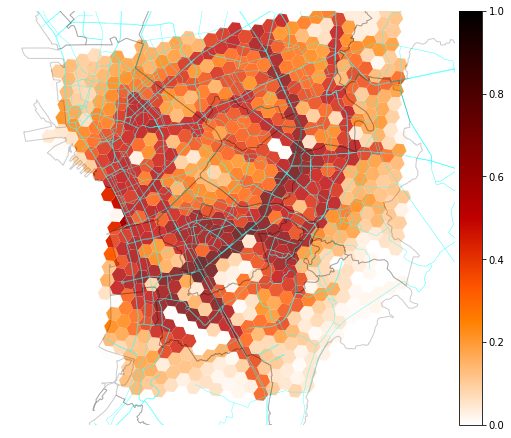

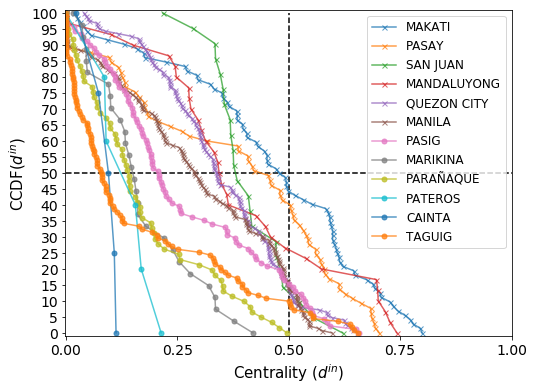

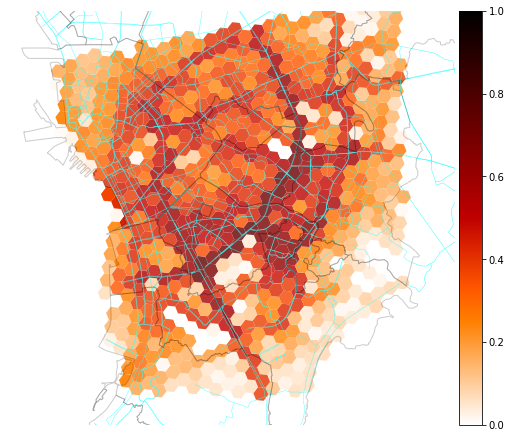

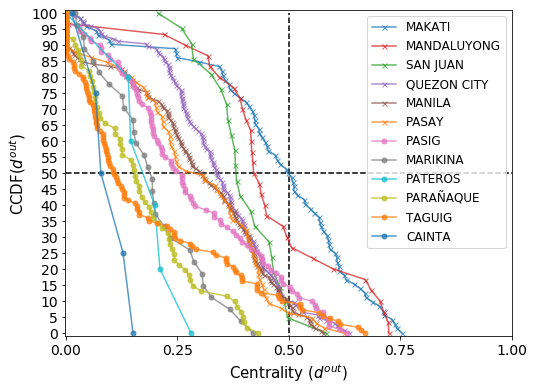

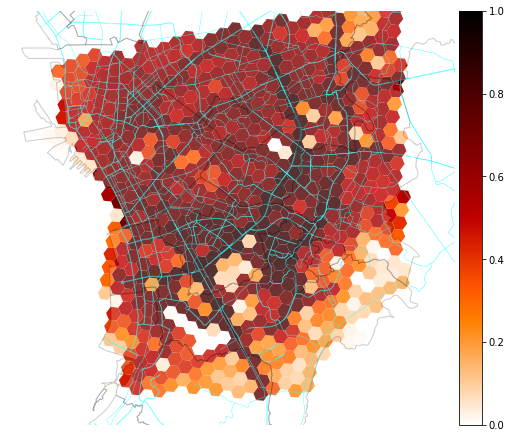

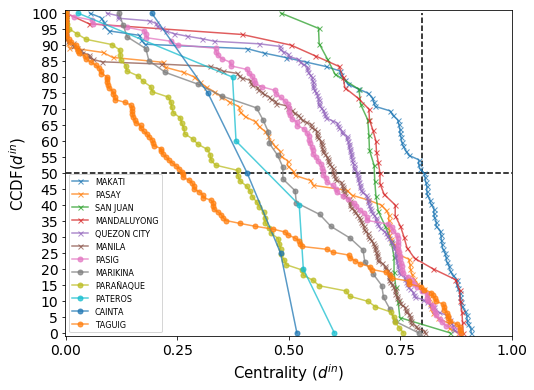

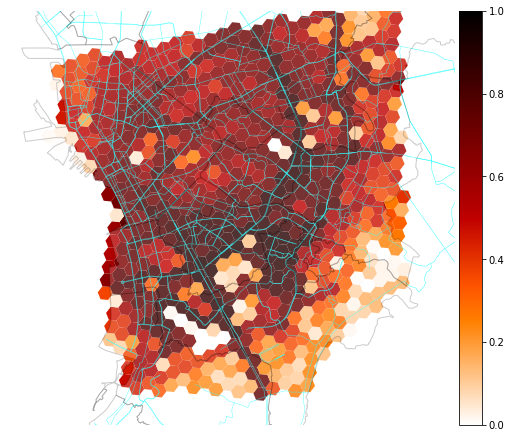

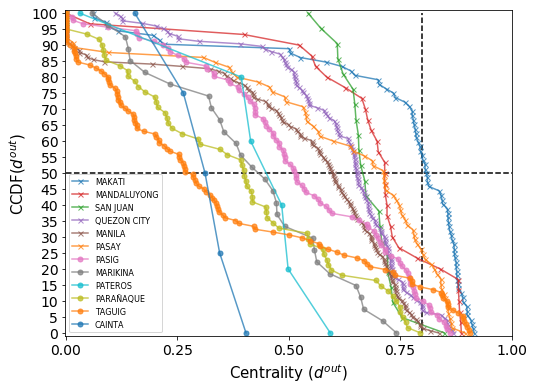

In [422]:
for hour in [7,22]: #Just replace the numbers in the array with the desired hours to study
    for kind in ['in','out']:
        data_ = data_2[data_2['hod']==hour]
        print(hour)
        print(kind)
        info = pre_plot_map(hour,kind)
        allscores_new = info[0]
        cities_ordered = info[1]
        allscores = info[2]
        plot_map(kind)
        cleaner()
        
        if hour == 7:
            if kind=='in':
                info_1 = prep_ccdf(kind)
                in_order = info_1[0]
            elif kind=='out':
                info_1 = prep_ccdf(kind)
                out_order = info_1[0]

        elif hour==22:
            info_1 = prep_ccdf(kind)
        sortedcityindices_median= info_1[0]
        ccdf_data = info_1[1]
        
        plot_ccdf()
        percent_CCDF(50)
        #print(kind)

    uber.to_file("centrality_Manila_hour_{}.json".format(hour), driver="GeoJSON")

### NET USAGE PATTERN MAPS

In [121]:
testlang = gpd.read_file("centrality_Manila_hour_22.json")

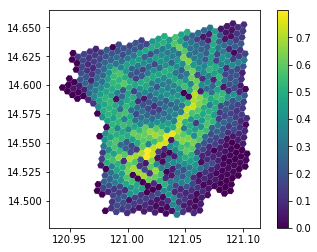

In [116]:
testlang.plot(column='in_Centrality',legend=True)

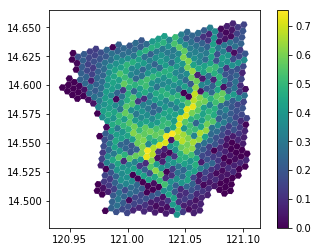

In [115]:
testlang.plot(column='out_Centrality',legend=True)

In [117]:
testlang.head(15)

MOVEMENT_I                                       DISPLAY_NA  in_Centrality  \
0           3                      Unnamed Road, Tondo, Manila       0.000000   
1           4          Miguel de Legaspi Street, Tondo, Manila       0.000000   
2           5          300 Younger Street, 132 Zone 11, Manila       0.116798   
3           6                100 Pag-asa Street, Tondo, Manila       0.080052   
4           7                  Taysan Road, Santa Cruz, Manila       0.000000   
5           8      0 A. Bonifacio Avenue, La Loma, Quezon City       0.188976   
6           9                   100 Sct M Alcaraz, Quezon City       0.217848   
7          10  0 Caragay, San Francisco del Monte, Quezon City       0.145669   
8          11                          0 Times, Lungsod Quezon       0.500000   
9          12                 Mayaman, Diliman, Lungsod Quezon       0.505249   
10         13             Regidor Street, Diliman, Quezon City       0.307087   
11         14                        Lacewing Street, Marikina       0.045932   
12         15                                   Road, Marikina       0.101050   
13         16                                0 Agnes, Marikina       0.141732   
14         17                              0 Redwood, Marikina       0.161417   

    out_Centrality                                           geometry  \
0         0.000000  POLYGON ((120.9488406306006 14.62247604964226,...   
1         0.000000  POLYGON ((120.9496480977025 14.62796326866025,...   
2         0.139108  POLYGON ((120.9642506514763 14.62933594077843,...   
3         0.135171  POLYGON ((120.9693879480013 14.63162252804203,...   
4         0.000000  POLYGON ((120.9839936370777 14.6329943605419, ...   
5         0.229659  POLYGON ((120.9891320899784 14.63528079817513,...   
6         0.263780  POLYGON ((121.0037409121105 14.63665178989192,...   
7         0.206037  POLYGON ((121.0088805205489 14.63893807714905,...   
8         0.426509  POLYGON ((121.0286332362801 14.64259436274894,...   
9         0.258530  POLYGON ((121.0483902340064 14.64624965305868,...   
10        0.324147  POLYGON ((121.0681515103541 14.64990394586818,...   
11        0.074803  POLYGON ((121.0879170620067 14.65355723925051,...   
12        0.152231  POLYGON ((121.0973964485349 14.65263845750171,...   
13        0.194226  POLYGON ((121.0965864808489 14.64714824624699,...   
14        0.200787  POLYGON ((121.0984914325271 14.62747123538889,...   

        diff  
0   0.000000  
1   0.000000  
2   0.255906  
3   0.215223  
4   0.000000  
5   0.418635  
6   0.481627  
7   0.351706  
8   0.926509  
9   0.763780  
10  0.631234  
11  0.120735  
12  0.253281  
13  0.335958  
14  0.362205

In [2]:
def net_usage(testlang_,hour):
    vmin = -1
    vmax= 1
    ax = testlang_.plot(figsize=(10,10),column='diff',cmap='seismic',vmin=vmin,vmax=vmax)
    metro_manila.plot(ax=ax,color='white',alpha=0.2,edgecolor='black', linewidth=1,zorder=3)

    roads.plot(ax=ax,color='cyan',alpha=0.75,edgecolor='black', linewidth=0.5,zorder=2)
    #ADD ROADS LAYER
    #edges[plot_edges].plot(ax=ax, zorder=2,alpha=0.5,linewidth=1,color="blue")

    #plt.title('Metro Manila')
    #SET XLIM AND YLIM OF MAP
    #plt.title('Metro Manila Centrality Map [Hour: {}]'.format(hour),fontsize=20)
    plt.xlim(120.9355,121.125)
    plt.ylim(14.475,14.65)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

    #PLACE COLORBAR
    fig = ax.get_figure()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # fake up the array of the scalar mappable.
    sm._A = []
    fig.colorbar(sm, cax=cax)
    
    plt.savefig("net_usage_manila_{}.pdf".format(hour) ,bbox_inches='tight', dpi=1000)

In [3]:
testlang6= gpd.read_file("centrality_Manila_hour_6.json")
testlang6['diff'] = testlang6.apply(lambda row: row.in_Centrality - row.out_Centrality, axis=1)
net_usage(testlang6)

NameError: name 'gpd' is not defined

In [415]:
testlang = gpd.read_file("centrality_Manila_hour_7.json")
testlang['diff'] = testlang.apply(lambda row: row.in_Centrality - row.out_Centrality, axis=1)

In [4]:
net_usage(testlang,7)

NameError: name 'testlang' is not defined

In [417]:
testlang2= gpd.read_file("centrality_Manila_hour_22.json")
testlang2['diff'] = testlang2.apply(lambda row: row.in_Centrality - row.out_Centrality, axis=1)

In [5]:
net_usage(testlang2,22)

NameError: name 'testlang2' is not defined

In [6]:
testlang18= gpd.read_file("centrality_Manila_hour_18.json")
testlang18['diff'] = testlang18.apply(lambda row: row.in_Centrality - row.out_Centrality, axis=1)
net_usage(testlang18)

NameError: name 'gpd' is not defined

In [7]:
testlang20= gpd.read_file("centrality_Manila_hour_20.json")
testlang20['diff'] = testlang20.apply(lambda row: row.in_Centrality - row.out_Centrality, axis=1)
net_usage(testlang20)

NameError: name 'gpd' is not defined

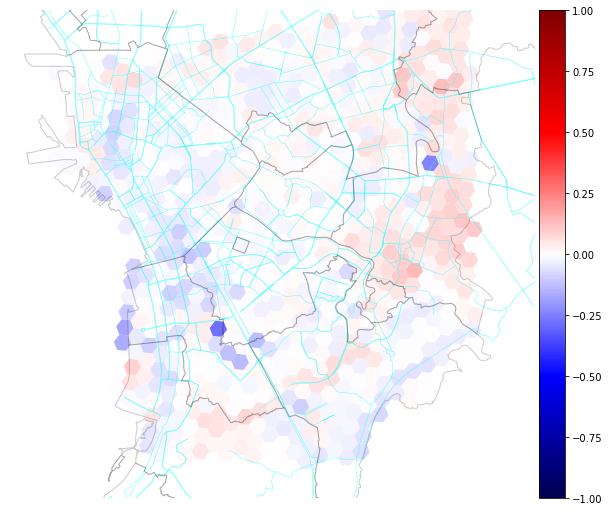

In [367]:
testlang17= gpd.read_file("centrality_Manila_hour_17.json")
testlang17['diff'] = testlang17.apply(lambda row: row.in_Centrality - row.out_Centrality, axis=1)
net_usage(testlang17)

In [412]:
hour7 = gpd.read_file("centrality_Manila_hour_7.json")
hour22= gpd.read_file("centrality_Manila_hour_22.json")

In [238]:
cities_ordered

['Makati',
 'Taguig',
 'Pasay',
 'Mandaluyong',
 'Manila',
 'Quezon City',
 'Parañaque',
 'Pasig',
 'San Juan',
 'Marikina',
 'Pateros',
 'Cainta']

In [246]:
test_makati7 = hour7.loc[hour7['city']=='Makati'].in_Centrality.values
test_taguig7= hour7.loc[hour7['city']=='Taguig'].in_Centrality.values
test_makati22= hour22.loc[hour22['city']=='Makati'].in_Centrality.values
test_taguig22= hour22.loc[hour22['city']=='Taguig'].in_Centrality.values

In [317]:
def ks_test(kind,city,plot=True):
    if kind =='in':
        off = hour7.loc[hour7['city']==city].in_Centrality.values
        peak = hour22.loc[hour7['city']==city].in_Centrality.values
    else:
        off = hour7.loc[hour7['city']==city].out_Centrality.values
        peak = hour22.loc[hour7['city']==city].out_Centrality.values
    
    x,y = ccdf(off)
    x2,y2 = ccdf(peak)
    statistic, p  = scipy.stats.ks_2samp(off,peak)
    print(statistic)
    if plot==True:
        plt.figure(figsize=(8,6))
        plt.plot(x,y,linestyle='-',alpha=0.75,color='C0',label='Off-peak')
        plt.plot(x2,y2,linestyle='--',linewidth=2,alpha=0.75,color='C0',label='Peak')
        plt.margins(0.03)

        plt.ylabel('CCDF (%)',fontsize=15)
        if kind == 'in':
            plt.xlabel("Centrality ($d_{i}^{in}$)",fontsize=15)
        else:
            plt.xlabel("Centrality ($d_{i}^{out}$)",fontsize=15)
        if hour == 7:
            plt.legend(fontsize=15,ncol=1)
        elif hour == 22:
            plt.legend(fontsize=15,ncol=1)
        #set xtick and y tick fontsize
        plt.title(city)
        plt.yticks(np.arange(0,101,5),fontsize=14)
        plt.xticks(np.linspace(0,1,5),fontsize=14)
        plt.xlim(-0.001,1)
        plt.ylim(-1,101)
        
    

0.589041095890411


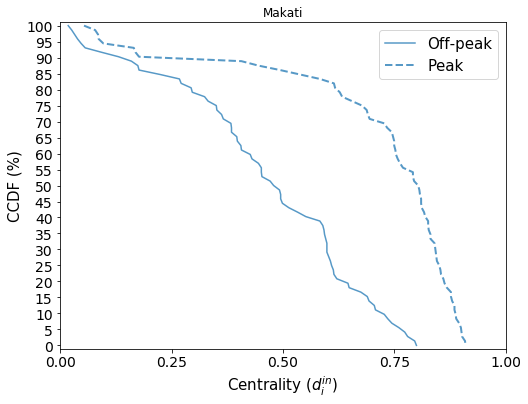

In [318]:
ks_test('in','Makati')

0.3839285714285714


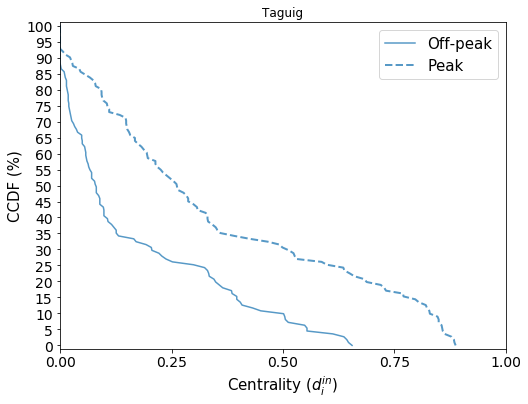

In [319]:
ks_test('in','Taguig')

In [389]:
def ccdf_new(plot_city,kind,percent=50,peak=True):
    plt.figure(figsize=(8,6))
    if peak==True:
        for_ccdf = hour7
    else:
        for_ccdf = hour22
        
    for city in plot_city:
        if kind == 'in':
            values = for_ccdf.loc[hour7['city']==city].in_Centrality.values
        else:
            values = for_ccdf.loc[hour7['city']==city].out_Centrality.values
        x_vers,y_vers = ccdf(values)
        if city.upper()== 'MAKATI':
            plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C0',label='MAKATI')
        elif city.upper()== 'PASAY':
            plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C1',label='PASAY')
        elif city.upper()== 'SAN JUAN':
            plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C2',label='SAN JUAN')
        elif city.upper() == 'MANDALUYONG':
            plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C3',label='MANDALUYONG')
        elif city.upper() == 'QUEZON CITY':
            plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C4',label='QUEZON CITY')
        elif city.upper()== 'MANILA':
            plt.plot(x_vers,y_vers,marker='x',markersize=5,linestyle='-',alpha=0.75,color='C5',label='MANILA')
        elif city.upper() == 'PASIG':
            plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C6',label='PASIG')
        elif city.upper() == 'MARIKINA':
            plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C7',label='MARIKINA')
        elif city.upper() == 'PARAÑAQUE':
            plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C8',label='PARAÑAQUE')
        elif city.upper() == 'PATEROS':
            plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C9',label='PATEROS')
        elif city.upper()== 'CAINTA':
            plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C0',label='CAINTA')
        elif city.upper() == 'TAGUIG':
            plt.plot(x_vers,y_vers,marker='o',markersize=5,linestyle='-',alpha=0.75,color='C1',label='TAGUIG')
            
        differences = []
        for index,value in enumerate(y_vers):
            differences.append(abs(percent-value))
        print("{}% of".format(percent),city,"has at least a centrality value of :",round(x_vers[differences.index(min(differences))],3))
    plt.legend(fontsize=15)
    plt.yticks(np.arange(0,101,5),fontsize=14)
    plt.xticks(np.linspace(0,1,5),fontsize=14)
    plt.xlim(-0.001,1)
    plt.ylim(-1,101)
    plt.ylabel('CCDF ($d^{in}$)',fontsize=15)
    if kind == 'in':
        plt.xlabel("Centrality ($d^{in}$)",fontsize=15)
    else:
        plt.xlabel("Centrality ($d^{out}$)",fontsize=15)

50% of Makati has at least a centrality value of : 0.479
50% of Taguig has at least a centrality value of : 0.081


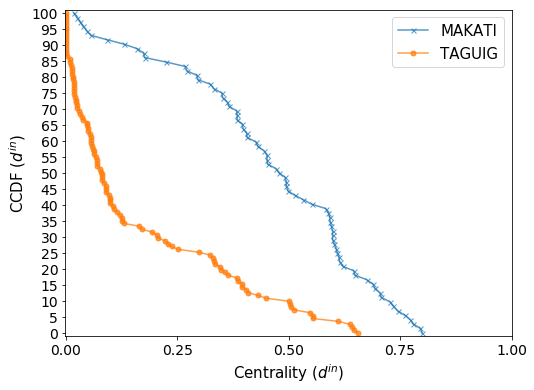

In [390]:
ccdf_new(['Makati','Taguig'],'in',50,True)

0.589041095890411


(-1, 101)

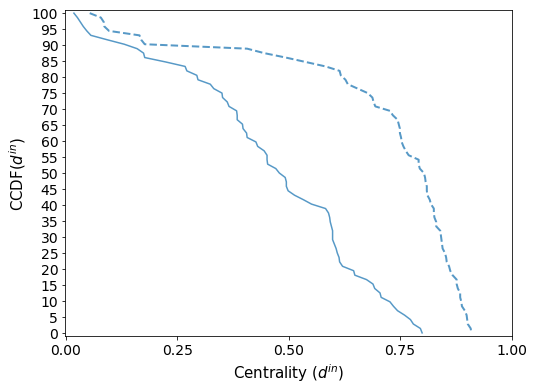

In [396]:
kind = 'in'
x,y = ccdf(test_makati7)
x2,y2 = ccdf(test_makati22)
statistic, p  = scipy.stats.ks_2samp(test_makati7,test_makati22)
print(statistic)
plt.figure(figsize=(8,6))
plt.plot(x,y,linestyle='-',alpha=0.75,color='C0',label='Off-peak')
plt.plot(x2,y2,linestyle='--',linewidth=2,alpha=0.75,color='C0',label='Peak')
plt.margins(0.03)


if kind == 'in':
    plt.xlabel("Centrality ($d^{in}$)",fontsize=15)
    plt.ylabel('CCDF($d^{in}$)',fontsize=15)
else:
    plt.xlabel("Centrality ($d^{out}$)",fontsize=15)
    plt.ylabel('CCDF($d^{out}$)',fontsize=15)
# if hour == 7:
#     plt.legend(fontsize=15,ncol=1)
# elif hour == 22:
#     #plt.legend(fontsize=15,ncol=1)
#set xtick and y tick fontsize
#plt.title("Makati")
plt.yticks(np.arange(0,101,5),fontsize=14)
plt.xticks(np.linspace(0,1,5),fontsize=14)
plt.xlim(-0.001,1)
plt.ylim(-1,101)

0.3839285714285714


(-1, 101)

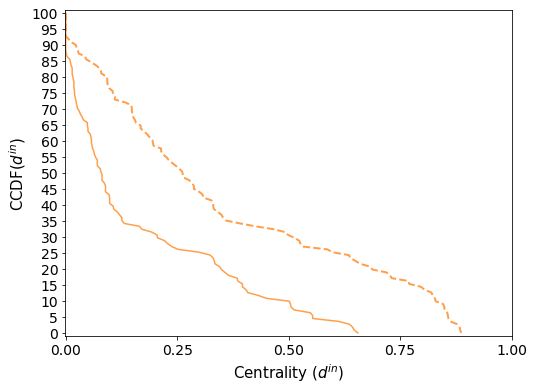

In [395]:
#arker='o',markersize=5,linestyle='-',alpha=0.75,color='C1',
kind = 'in'
x,y = ccdf(test_taguig7)
x2,y2 = ccdf(test_taguig22)
statistic, p  = scipy.stats.ks_2samp(test_taguig7,test_taguig22)
print(statistic)
plt.figure(figsize=(8,6))
plt.plot(x,y,linestyle='-',alpha=0.75,color='C1',label='off-peak')
plt.plot(x2,y2,linestyle='--',linewidth=2,alpha=0.75,color='C1',label='peak')
plt.margins(0.03)

if kind == 'in':
    plt.xlabel("Centrality ($d^{in}$)",fontsize=15)
    plt.ylabel('CCDF($d^{in}$)',fontsize=15)
else:
    plt.xlabel("Centrality ($d^{out}$)",fontsize=15)
    plt.ylabel('CCDF($d^{out}$)',fontsize=15)
# if hour == 7:
#     plt.legend(fontsize=15,ncol=1)
# elif hour == 22:
#     plt.legend(fontsize=15,ncol=1)
#set xtick and y tick fontsize
#plt.title("TAGUIG",fontsize=14)
plt.yticks(np.arange(0,101,5),fontsize=14)
plt.xticks(np.linspace(0,1,5),fontsize=14)
plt.xlim(-0.001,1)
plt.ylim(-1,101)

0.6451612903225806


(-1, 101)

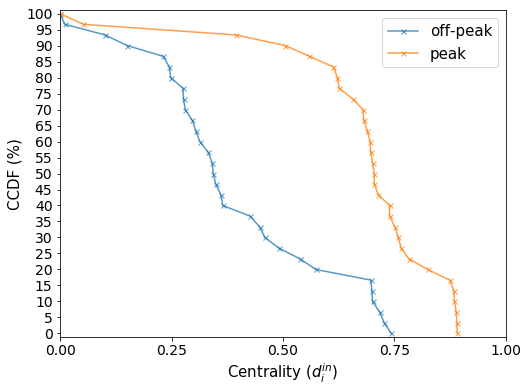

In [259]:
test_manda7 = hour7.loc[hour7['city']=='Mandaluyong'].in_Centrality.values
test_manda22= hour22.loc[hour22['city']=='Mandaluyong'].in_Centrality.values

kind = 'in'
x,y = ccdf(test_manda7)
x2,y2 = ccdf(test_manda22)
statistic, p  = scipy.stats.ks_2samp(test_manda7,test_manda22)
print(statistic)
plt.figure(figsize=(8,6))
plt.plot(x,y,marker='x',markersize=5,linestyle='-',alpha=0.75,label='off-peak')
plt.plot(x2,y2,marker='x',markersize=5,linestyle='-',alpha=0.75,label='peak')
plt.margins(0.03)

plt.ylabel('CCDF (%)',fontsize=15)
if kind == 'in':
    plt.xlabel("Centrality ($d_{i}^{in}$)",fontsize=15)
else:
    plt.xlabel("Centrality ($d_{i}^{out}$)",fontsize=15)
if hour == 7:
    plt.legend(fontsize=15,ncol=1)
elif hour == 22:
    plt.legend(fontsize=15,ncol=1)
#set xtick and y tick fontsize
plt.yticks(np.arange(0,101,5),fontsize=14)
plt.xticks(np.linspace(0,1,5),fontsize=14)
plt.xlim(-0.001,1)
plt.ylim(-1,101)

0.6330935251798562


(-1, 101)

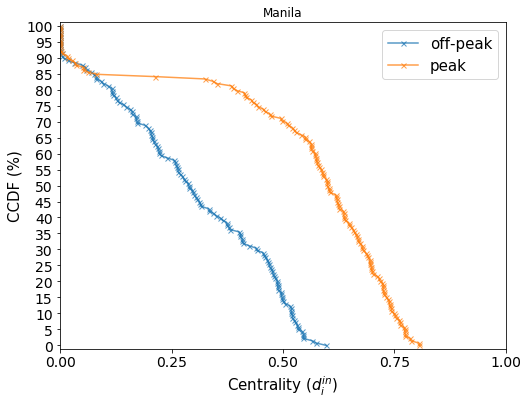

In [275]:
test_manila7 = hour7.loc[hour7['city']=='Manila'].in_Centrality.values
test_manila22= hour22.loc[hour22['city']=='Manila'].in_Centrality.values

kind = 'in'
x,y = ccdf(test_manila7)
x2,y2 = ccdf(test_manila22)
statistic, p  = scipy.stats.ks_2samp(test_manila7,test_manila22)
print(statistic)
plt.figure(figsize=(8,6))
plt.plot(x,y,marker='x',markersize=5,linestyle='-',alpha=0.75,label='off-peak')
plt.plot(x2,y2,marker='x',markersize=5,linestyle='-',alpha=0.75,label='peak')
plt.margins(0.03)

plt.ylabel('CCDF (%)',fontsize=15)
if kind == 'in':
    plt.xlabel("Centrality ($d_{i}^{in}$)",fontsize=15)
else:
    plt.xlabel("Centrality ($d_{i}^{out}$)",fontsize=15)
if hour == 7:
    plt.legend(fontsize=15,ncol=1)
elif hour == 22:
    plt.legend(fontsize=15,ncol=1)
#set xtick and y tick fontsize
plt.title("Manila")
plt.yticks(np.arange(0,101,5),fontsize=14)
plt.xticks(np.linspace(0,1,5),fontsize=14)
plt.xlim(-0.001,1)
plt.ylim(-1,101)

0.5652173913043479


(-1, 101)

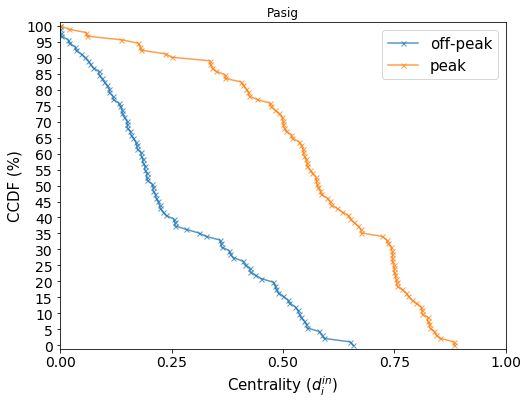

In [276]:
test_pasig7 = hour7.loc[hour7['city']=='Pasig'].in_Centrality.values
test_pasig22= hour22.loc[hour22['city']=='Pasig'].in_Centrality.values

kind = 'in'
x,y = ccdf(test_pasig7)
x2,y2 = ccdf(test_pasig22)
statistic, p  = scipy.stats.ks_2samp(test_pasig7,test_pasig22)
print(statistic)
plt.figure(figsize=(8,6))
plt.plot(x,y,marker='x',markersize=5,linestyle='-',alpha=0.75,label='off-peak')
plt.plot(x2,y2,marker='x',markersize=5,linestyle='-',alpha=0.75,label='peak')
plt.margins(0.03)

plt.ylabel('CCDF (%)',fontsize=15)
if kind == 'in':
    plt.xlabel("Centrality ($d_{i}^{in}$)",fontsize=15)
else:
    plt.xlabel("Centrality ($d_{i}^{out}$)",fontsize=15)
if hour == 7:
    plt.legend(fontsize=15,ncol=1)
elif hour == 22:
    plt.legend(fontsize=15,ncol=1)
#set xtick and y tick fontsize
plt.title("Pasig")
plt.yticks(np.arange(0,101,5),fontsize=14)
plt.xticks(np.linspace(0,1,5),fontsize=14)
plt.xlim(-0.001,1)
plt.ylim(-1,101)

In [323]:
unique,counts = np.unique(uber.in_Centrality.values,return_counts=True)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

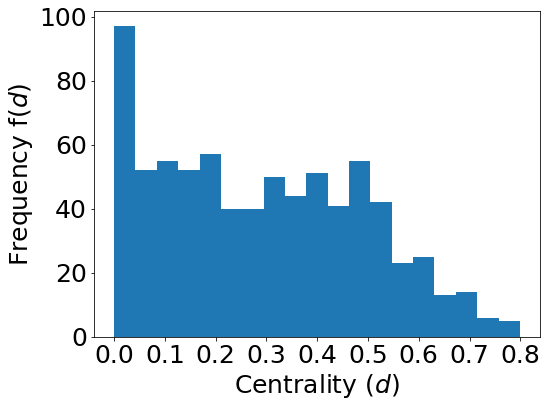

In [397]:
plt.figure(figsize=(8,6))
plt.hist(uber.in_Centrality.values,bins='rice')
plt.ylabel(r"Frequency f$(d)$",fontsize=25)
plt.xlabel("Centrality $(d)$",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

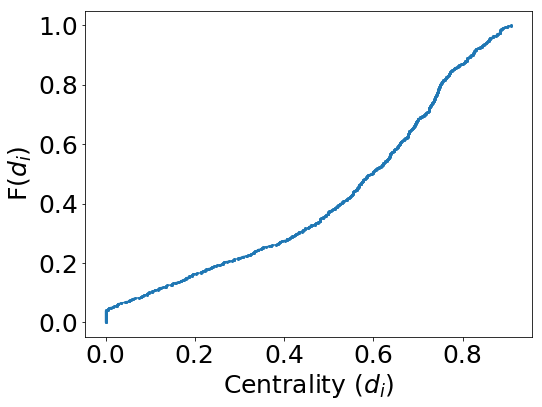

In [353]:
x  = np.sort(uber.in_Centrality.values)
y = np.arange(1,len(x)+1)/len(x)
plt.figure(figsize=(8,6))
plt.plot(x,y, marker='o',markersize='2')
plt.ylabel("F$(d_i)$",fontsize=25)
plt.xlabel("Centrality $(d_i)$",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

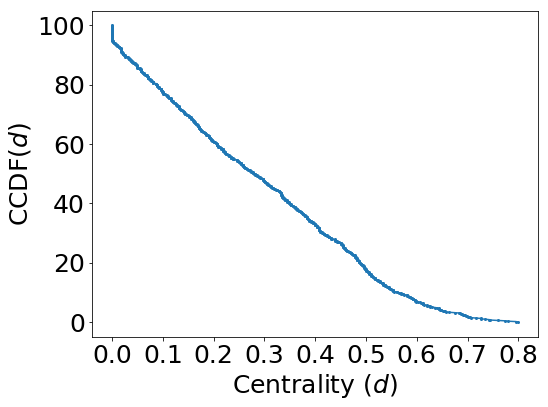

In [398]:
x,y = ccdf(uber.in_Centrality.values)
plt.figure(figsize=(8,6))
plt.plot(x,y, marker='o',markersize='2')
plt.ylabel("CCDF$(d)$",fontsize=25)
plt.xlabel("Centrality $(d)$",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

### RESOURCE ALLOCATION VIZ

In [424]:
m_off_peak = gpd.read_file("centrality_Manila_hour_7.json")
m_peak = gpd.read_file("centrality_Manila_hour_22.json")

In [425]:
def prep_clust(kind,mini,hour):
    vmin, vmax = 0, 0.9
    #vmin, vmax = 0, 0.255
    #ADD HEXES LAYER
    if hour==22:
        zones = m_peak
    else:
        zones= m_off_peak
    zones['categ'] = 0
    print(zones.columns)
    zones.loc[(zones['{}_Centrality'.format(kind)]>=round(mini,4)-0.005) & (zones['{}_Centrality'.format(kind)]<round(mini,4)) , 'categ'] = 1
    zones.loc[zones['{}_Centrality'.format(kind)]>=round(mini,4), 'categ'] = 2
    #zones.categ
    #ax = uber[(uber['{}_Centrality'.format(kind)]>=mini)].plot(figsize=(8.5,8.5),color='red', vmin=vmin, vmax=vmax,zorder=2)
    ax = zones.plot(figsize=(8.5,8.5),column='categ',cmap='Set1_r',zorder=1,vmin=0,vmax=2)
    #plt.title("Centrality")
    #ADD METRO MANILA SHAPEFILES LAYER
    metro_manila.plot(ax=ax,color='white',alpha=0.2,edgecolor='black', linewidth=1,zorder=3)

    roads.plot(ax=ax,color='cyan',alpha=0.75,edgecolor='black', linewidth=0.5,zorder=2)
    #ADD METRO MANILA SHAPEFILES LAYER
    #metro_manila.plot(ax=ax,color='white',alpha=0.2,edgecolor='black', linewidth=2,zorder=1)

    #ADD ROADS LAYER
    #edges[plot_edges].plot(ax=ax, zorder=2,alpha=0.5,linewidth=1,color="blue")

    #plt.title('Metro Manila')
    #SET XLIM AND YLIM OF MAP
    plt.title(mini,fontsize=20)
    plt.xlim(120.9355,121.125)
    plt.ylim(14.475,14.655)
    plt.xticks([])
    plt.yticks([])
    ax.axis('off')
    #plt.savefig("OUT_DEGREE_MANILA_MAP.png")



    #uber['Centrality']= 0 

        #reference:
        #https://stackoverflow.com/questions/36008648/colorbar-on-geopandas  
    #plt.savefig('{}_centrality_from_greater_than_{}_hour_{}.png'.format(kind,round(mini,4),hour), format='png', dpi=300)
    #plt.close()

In [181]:
len(m_peak)

762

In [182]:
round(0.010,4)

0.01

In [145]:
unique,counts = np.unique(m_peak['in_Centrality'].values,return_counts=True)

In [173]:
len(unique[(unique>=0) & (unique<0.005)])

3

In [192]:
max(unique)

0.9094488188976378

In [146]:
print(unique[1:][list(counts[1:]).index(max(counts[1:]))])

0.7244094488188977


In [147]:
len(m_peak[m_peak['in_Centrality']==0.010])

0

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality', 'city',
       'geometry', 'categ'],
      dtype='object')


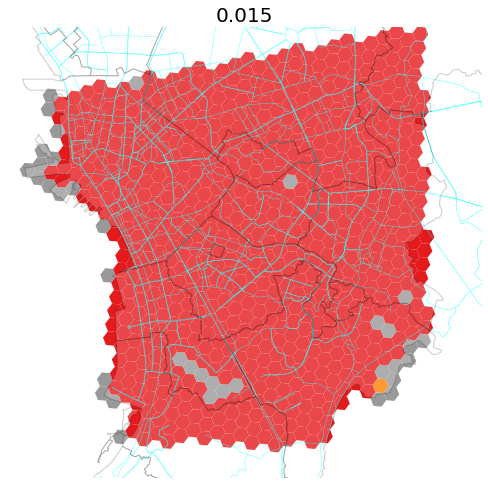

In [426]:
prep_clust('in',0.015,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


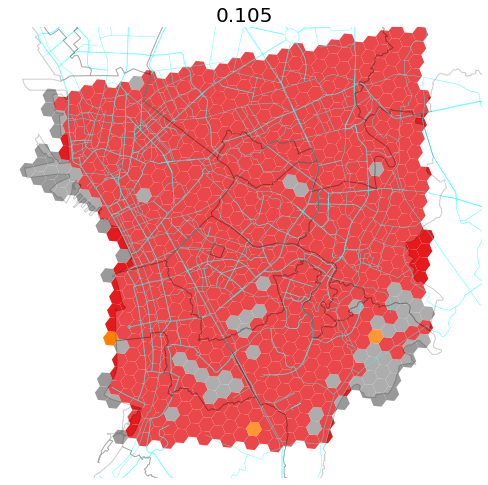

In [14]:
prep_clust('in',0.105,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality', 'city',
       'geometry', 'categ'],
      dtype='object')


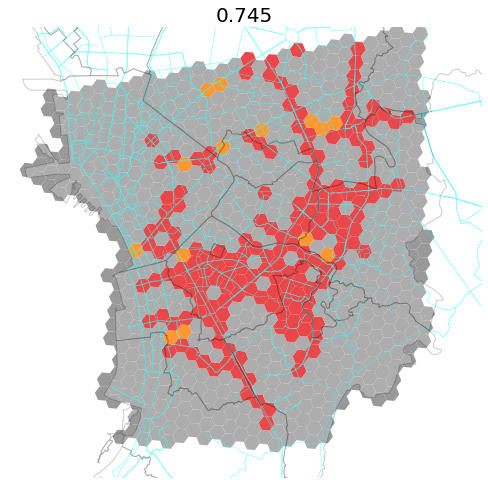

In [427]:
prep_clust('in',0.745,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


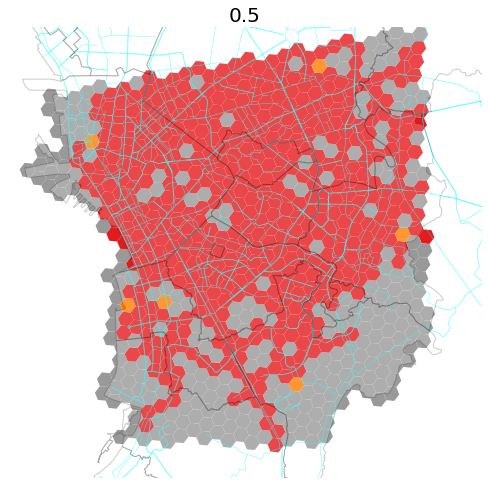

In [370]:
prep_clust('in',0.50,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality', 'city',
       'geometry', 'categ'],
      dtype='object')


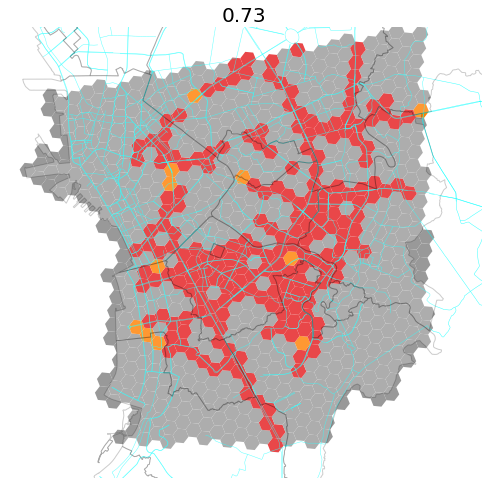

In [428]:
prep_clust('in',0.730,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


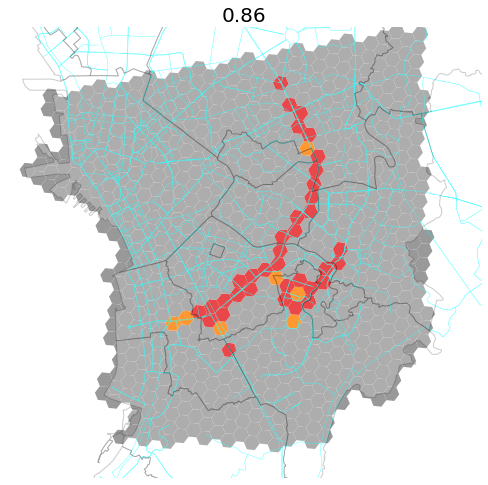

In [154]:
prep_clust('in',0.860,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


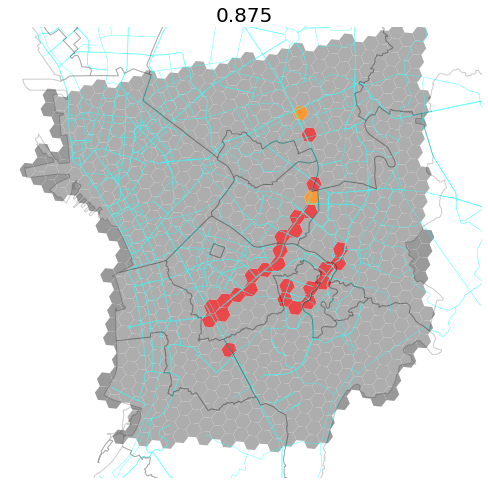

In [185]:
prep_clust('in',0.875,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


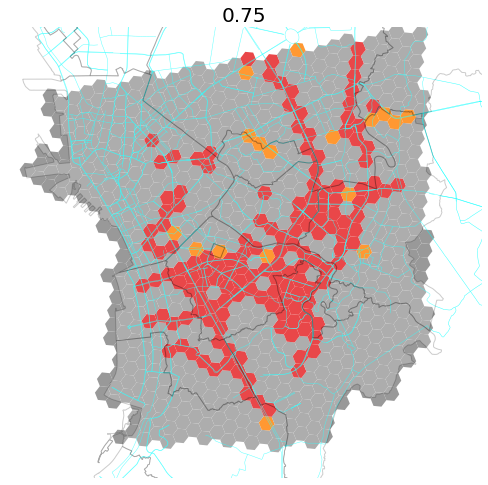

In [187]:
prep_clust('in',0.750,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


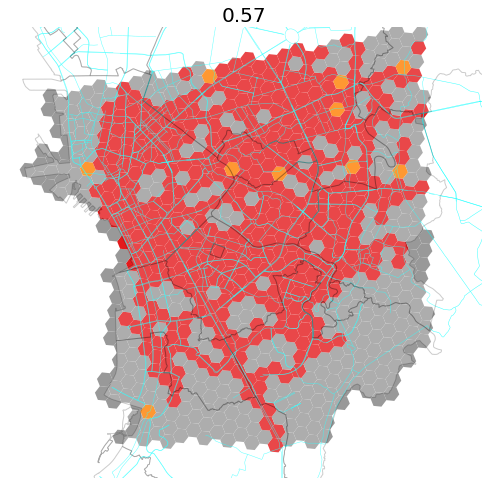

In [188]:
prep_clust('in',0.57,22)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


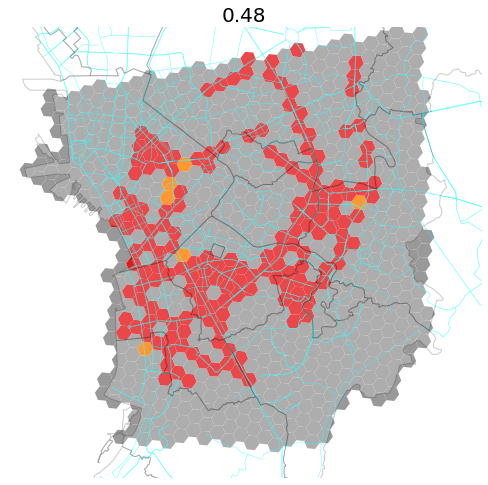

In [15]:
prep_clust('in',0.480,3)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


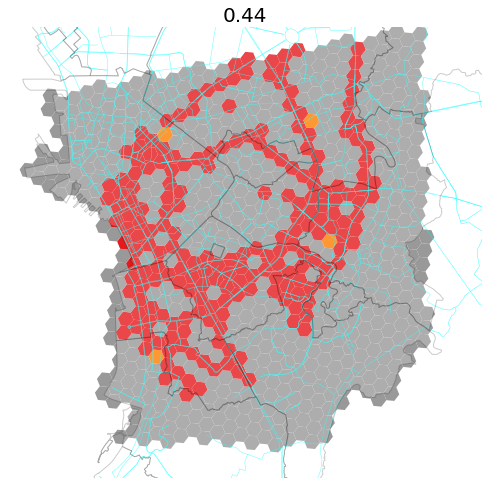

In [16]:
prep_clust('in',0.440,3)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


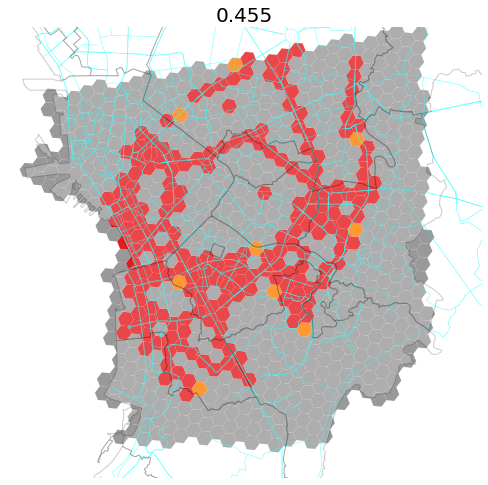

In [17]:
prep_clust('in',0.455,3)

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


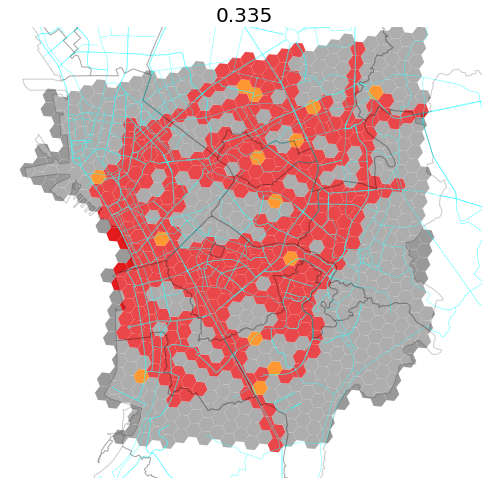

In [18]:
prep_clust('in',0.,3)

### RESOURCE ALLOCATION PREP

In [409]:
def prep_clust(kind,mini,hour):
    vmin, vmax = 0, 0.9
    #vmin, vmax = 0, 0.255
    #ADD HEXES LAYER
    if hour==22:
        zones = m_peak
    else:
        zones= m_off_peak
    zones['categ'] = 0
    print(zones.columns)
#     zones.loc[(zones['{}_Centrality'.format(kind)]>=round(mini,4)-0.005) & (zones['{}_Centrality'.format(kind)]<round(mini,4)) , 'categ'] = 1
#     zones.loc[zones['{}_Centrality'.format(kind)]>=round(mini,4), 'categ'] = 2
    #zones.categ
    ax = zones[(zones['{}_Centrality'.format(kind)]>=mini)].plot(figsize=(8.5,8.5),color='red', vmin=vmin, vmax=vmax,zorder=2)
    #ax = zones.plot(figsize=(8.5,8.5),column='categ',cmap='Set1_r',zorder=1,vmin=0,vmax=2)
    #plt.title("Centrality")
    #ADD METRO MANILA SHAPEFILES LAYER
    #metro_manila.plot(ax=ax,color='white',alpha=0.2,edgecolor='black', linewidth=1,zorder=3)

    #roads.plot(ax=ax,color='cyan',alpha=0.75,edgecolor='black', linewidth=0.5,zorder=2)
    #ADD METRO MANILA SHAPEFILES LAYER
    #metro_manila.plot(ax=ax,color='white',alpha=0.2,edgecolor='black', linewidth=2,zorder=1)

    #ADD ROADS LAYER
    #edges[plot_edges].plot(ax=ax, zorder=2,alpha=0.5,linewidth=1,color="blue")

    #plt.title('Metro Manila')
    #SET XLIM AND YLIM OF MAP
    #plt.title(mini,fontsize=20)
    plt.xlim(120.9355,121.125)
    plt.ylim(14.475,14.655)
    plt.xticks([])
    plt.yticks([])
    ax.axis('off')
    #plt.savefig("OUT_DEGREE_MANILA_MAP.png")



    #uber['Centrality']= 0 

        #reference:
        #https://stackoverflow.com/questions/36008648/colorbar-on-geopandas  
    plt.savefig('{}_centrality_from_greater_than_{}_hour_{}.png'.format(kind,round(mini,4),hour), format='png', dpi=300)
    plt.close()

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')


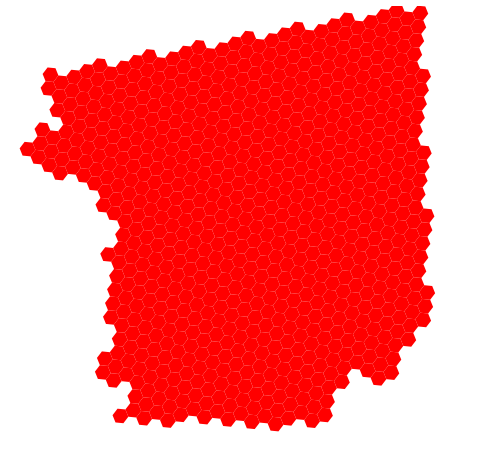

In [408]:
prep_clust('in',0.0,22)

In [410]:
cents = np.arange(0,1.005,0.005)
print(cents)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [411]:
for hour in [7,22]:
    for kind in ['in','out']:
        
        data_ = data_2[data_2['hod']==hour]
        

        print(hour)
        print(kind)
        info = pre_plot_map(hour,kind)
        allscores_new = info[0]
        cities_ordered = info[1]
        allscores = info[2]
        
        for city_info in allscores_new[0][:]:
            for _,score,address,move_id in city_info[0]:
                uber.loc[uber.MOVEMENT_I == str(move_id), '{}_Centrality'.format(kind)] = score
        for mini in cents:
            prep_clust(kind,mini,hour)
            #print(mini)

7
in
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.0
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.005
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.01
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.015
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.02
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.025
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.03
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype=

/usr/local/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


0.8
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.805
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.81
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.8150000000000001
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.8200000000000001
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.8250000000000001
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.8300000000000001
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'categ'],
      dtype='object')
0.835
Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out

### MEASURE TOTAL LAND AREA AND LARGEST CLUSTER AREA USING HK ALGORITHM

In [38]:
%load_ext Cython

In [39]:
%%cython

import numpy as np
cimport numpy as np
import time
cimport cython

DTYPE = np.uint32
ctypedef np.uint32_t DTYPE_t

def latticegen(int N, float p):
    cdef np.ndarray[DTYPE_t, ndim=2] lattice
    lattice = np.ones([N,N], dtype=DTYPE)*(np.random.random([N,N])<p)
    return lattice

cdef int find(int x, labellist):
    while labellist[x] != x:
        x = labellist[x]
    return x
    
cdef int union(int a, int b, labellist):
    cdef int above, left
    above = find(b, labellist)
    left = find(a, labellist)
    labellist[above] = left
    return left

def percolate(int N, int p, np.ndarray[DTYPE_t, ndim=2] labels, labellist):
    cdef int left, above, x, y
    cdef int largest_label = 0
    for x from 0<= x < N:
        for y from 0<= y < N:
            if labels[y,x]:
                if x!=0: left = labels[y, x-1]
                else: left = 0
                if y!=0: above = labels[y-1, x]
                else: above = 0
                if left == 0 and above == 0:
                    largest_label += 1
                    labellist.append(largest_label)
                    labels[y,x] = largest_label
                else:
                    if left != 0:
                        if above != 0:
                            labels[y,x] = union(left, above, labellist)
                        labels[y,x] = find(left, labellist)
                    else:
                        labels[y,x] = find(above, labellist)
    coll = collapse(N, labels, labellist)
    return coll
    
def collapse(int N, np.ndarray[DTYPE_t, ndim=2] labels, labellist):
    cdef int x, y
    newlist = [find(i, labellist) for i in range(len(labellist))]
    for x from 0<= x < N:
        for y from 0<= y < N:
            if labels[y,x]:
                labels[y,x] = newlist[labels[y,x]]
    return labels

    
def main(int N, float p):#, np.ndarray[DTYPE_t, ndim=2] labels):
    labels = latticegen(N,p)
    labellist = [0]
    s = percolate(N, p, labels, labellist)
    return s


In [43]:
def do_perc(image):
    labellist=[0]
    shape = image.shape[0]

    M = percolate(shape,0,image.astype(np.uint32),labellist)
    ## REDUCE LABELS 
    unique, counts = np.unique(M, return_counts=True)
    #print(unique,counts)
    for index,value in enumerate(unique):
        #print(index)
        M[M==value] =index
    if len(unique)>1:
        CLUSTER_SIZE = counts[unique!=0][counts[unique!=0] == counts[unique!=0].max()][0] #FIND  MAX FREQUENCY OF NON-ZERO CLUSTER
        TOTAL = sum(counts[unique!=0])
        NUM_CLUSTERS = len(unique)-1
    else:
        CLUSTER_SIZE =0
        TOTAL =0
        NUM_CLUSTERS = 0 
    #plt.figure(figsize=(10,10))
    #plt.imshow(M)
    #plt.axis('off')
    #plt.colorbar()
    
    #return unique,counts
    
    return NUM_CLUSTERS,CLUSTER_SIZE,TOTAL #Do not consider cluster of 0 values as a cluster

In [81]:
def load_binary(kind,cent,hour):
    img = plt.imread('{}_centrality_from_greater_than_{}_hour_{}.png'.format(kind,cent,hour))[:,:,1]
    #img = plt.imread('centrality_from_0.7_to_0.8.png')[:,:,1]/255.

    unique, counts = np.unique(img.flatten(),return_counts=True)

    copy = img<unique[-1].astype(int)
    
    plt.figure(figsize=(10,10))
    plt.imshow(copy,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.savefig('HK_sample_{}.pdf'.format(cent),bbox_inches='tight',dpi=1000)
    plt.close()
    return copy

In [94]:
load_binary('in',0.70,22)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [101]:
for hour in [7,22]:
    for kind in ['in','out']:    
        num_clusters= []
        cluster_sizes=[]
        total_sizes = []
        for i in [0.0]:
            print(round(i,4))
            num_cluster,size,total = do_perc(load_binary(kind,round(i,4),hour))
            num_clusters.append(num_cluster)
            cluster_sizes.append(size)
            total_sizes.append(total)
            
        a = list(zip(cents,cluster_sizes,num_clusters,total_sizes))
        with open('{}_cluster_analysis_MANILA_hour_{}.txt'.format(kind,hour),'a') as f:
            for i in a:
                f.write(str(i)+'\n')

0.0
0.0
0.0
0.0


In [102]:
kind = 'in'
hour = 7
with open('{}_cluster_analysis_MANILA_hour_{}.txt'.format(kind,hour)) as f:
    for line in f:
        line = line.replace(',','')
        #values = line[1:-3].split()
        #print(line)

2068150.0
2102384.0
2053888.0
2090791.0


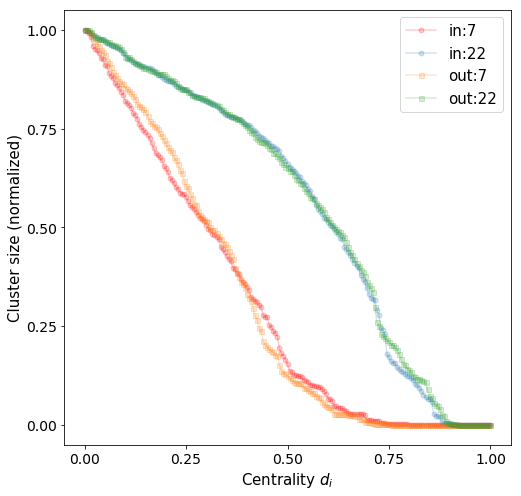

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))
for kind in ['in','out']:
    for hour in [7,22]:
        cents = []
        cluster_sizes = []
        num_clusters=[]
        with open('{}_cluster_analysis_MANILA_hour_{}.txt'.format(kind,hour)) as f:
            for line in f:
                line = line.replace(',','')
                values = line[1:-2].split()

                cents.append(float(values[0]))
                cluster_sizes.append(float(values[1]))
                num_clusters.append(float(values[2]))
                #print(values[2])

        print(cluster_sizes[0])

        if hour ==7:
            if kind=='in':
                plt.plot(cents, np.array(cluster_sizes)/max(cluster_sizes),'o-',  color='r',markersize= 5,alpha=0.2,label=kind+":"+str(hour))
            elif kind=='out':
                plt.plot(cents, np.array(cluster_sizes)/max(cluster_sizes), 's-',markersize= 5,alpha=0.2,label=kind+":"+str(hour))
        elif hour ==22:
            if kind=='in':
                plt.plot(cents, np.array(cluster_sizes)/max(cluster_sizes), 'o-',markersize=5,alpha=0.2,label=kind+":"+str(hour))
            elif kind=='out':
                plt.plot(cents, np.array(cluster_sizes)/max(cluster_sizes), 's-',markersize= 5,alpha=0.2,label=kind+":"+str(hour))
plt.title("")
plt.xlabel("Centrality $d_{i}$",fontsize=15)
plt.ylabel("Cluster size (normalized)",fontsize=15)

plt.yticks(np.linspace(0,1,5),fontsize=14)
plt.xticks(np.linspace(0,1,5),fontsize=14)
plt.legend(fontsize=15)

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) 
plt.savefig('MANILA_CLUSTER.pdf'.format(kind,hour),bbox_inches='tight',dpi=1000)


In [14]:
x,y = ccdf(uber.Centrality.values)
plt.figure(figsize=(8,8))
plt.plot(x,y)

NameError: name 'uber' is not defined

### ANALYSIS

In [106]:
off_peak = gpd.read_file("centrality_Manila_hour_7.json")
peak = gpd.read_file("centrality_Manila_hour_22.json")

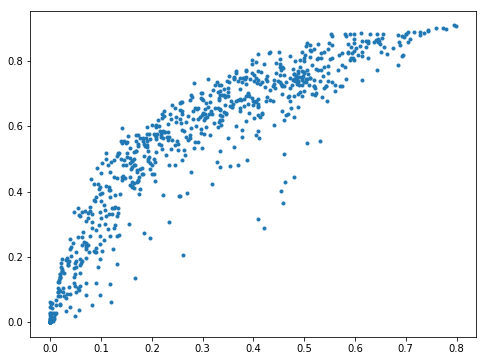

In [154]:
x = off_peak.in_Centrality.values
x_ = peak.in_Centrality.values
plt.figure(figsize=(8,6))
plt.plot(x,x_,'.')

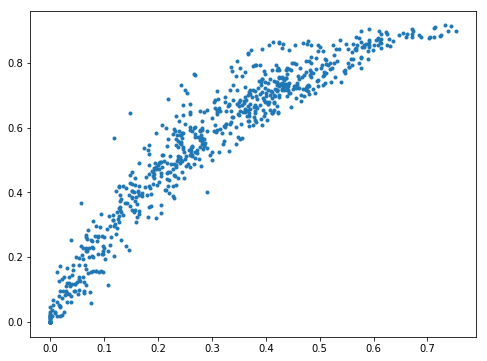

In [152]:
x = off_peak.out_Centrality.values
x_ = peak.out_Centrality.values
plt.figure(figsize=(8,6))
plt.plot(x,x_,'.')

In [16]:
off_peak[off_peak['in_Centrality'] == off_peak['in_Centrality'].max()]

MOVEMENT_I                                         DISPLAY_NA  \
178        241  0 * Lapu Lapu St Magallanes Village-Makati Cit...   

     in_Centrality  out_Centrality  \
178       0.799213        0.732283   

                                              geometry  
178  POLYGON ((121.0132693694793 14.53828363716031,...

In [17]:
peak[peak['in_Centrality'] == peak['in_Centrality'].max()]

MOVEMENT_I                       DISPLAY_NA  in_Centrality  \
199        273  2200 Chino Roces Avenue, Makati       0.909449   

     out_Centrality                                           geometry  
199        0.913386  POLYGON ((121.0140778119669 14.54377492655729,...

In [18]:
off_peak[off_peak['out_Centrality'] == off_peak['out_Centrality'].max()]

MOVEMENT_I                      DISPLAY_NA  in_Centrality  out_Centrality  \
350        434  Pan-Philippine Highway, Makati       0.779528        0.753281   

                                              geometry  
350  POLYGON ((121.0354464003527 14.55840613721809,...

In [19]:
peak[peak['out_Centrality'] == peak['out_Centrality'].max()]

MOVEMENT_I                                         DISPLAY_NA  \
178        241  0 * Lapu Lapu St Magallanes Village-Makati Cit...   

     in_Centrality  out_Centrality  \
178       0.908136         0.91601   

                                              geometry  
178  POLYGON ((121.0132693694793 14.53828363716031,...

In [28]:
def highlight(mov_id,zoom=False):
    uber['highlight'] = 0
    
    uber.loc[uber.MOVEMENT_I == str(mov_id),['highlight']] = 1
    
        
    vmin, vmax = 0,1
    #ax = boston_census.plot(figsize=(8.5,8.5),column='Centrality',cmap='Reds',vmin=vmin, vmax=vmax,zorder=1)

    ax = uber.plot(figsize=(10,10),column='highlight',cmap='Reds',zorder=1,edgecolor='black',linewidth=0.1,categorical=True)
    #plt.title(date) #date
    ax.axis('off')
    plt.xlim(120.9355,121.125)
    plt.ylim(14.475,14.65)
    plt.xticks([])
    plt.yticks([])
    
    roads.plot(ax=ax,color='yellow',alpha=0.2,edgecolor='blue', linewidth=2,zorder=2)
    #ADD ROADS LAYER
    #edges[plot_edges].plot(ax=ax, zorder=2,alpha=0.5,linewidth=1,color="blue")

    #PLACE COLORBAR
#     fig = ax.get_figure()
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.025)
#     sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#     # fake up the array of the scalar mappable.
#     sm._A = []

#     cbar = fig.colorbar(sm, cax=cax)
    
    #plt.savefig("{}_centrality_map_SFO.pdf"|.format(kind), dpi=1000)
    

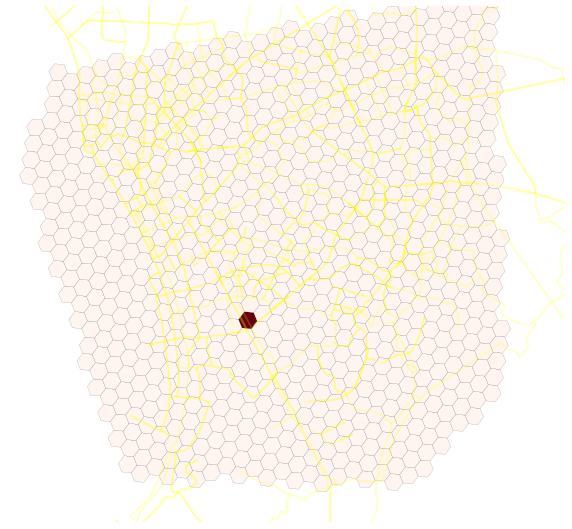

In [30]:
highlight(273)

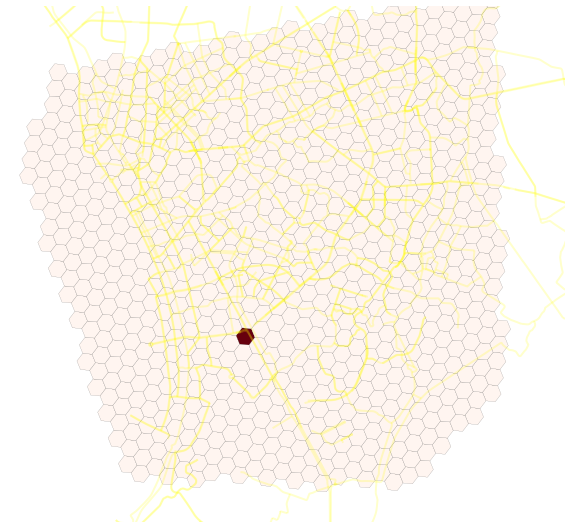

In [31]:
highlight(241)

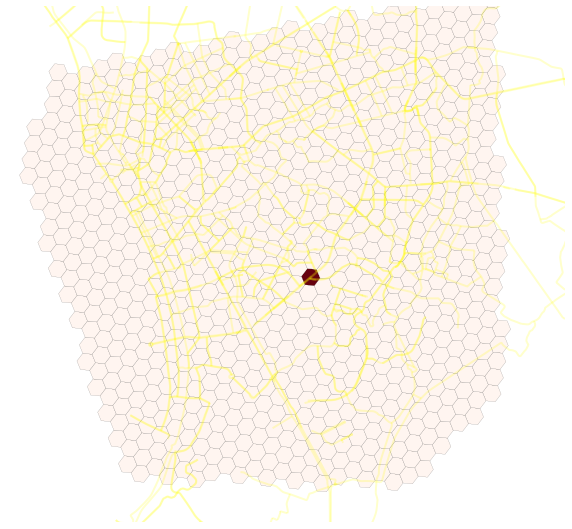

In [32]:
highlight(434)

### NEIGHBOR ANALYSIS

In [109]:
taz = off_peak.copy()
taz["NEIGHBORS"] = None  # add NEIGHBORS column

for index, zone in taz.iterrows():   
    # get 'not disjoint' countries
    neighbors = taz[~taz.geometry.disjoint(zone.geometry)].MOVEMENT_I.tolist()
    # remove own name from the list
    neighbors = [ name for name in neighbors if zone.MOVEMENT_I != name ]
    # add names of neighbors as NEIGHBORS value
    taz.at[index, "NEIGHBORS"] = ", ".join(neighbors)

In [112]:
def get_neighbors(origin):
    values = taz[taz['MOVEMENT_I']==str(origin)].NEIGHBORS.values[0].split(',')
    neighbors = []
    for neighbor in values:
        neighbor.strip()
        if neighbor!='':
            neighbors.append(int(neighbor)) 
    return neighbors

In [113]:
all_neighbors=[]
for movement_id in taz.MOVEMENT_I.values.astype(int):
    all_neighbors.append((get_neighbors(movement_id)))

In [114]:
taz.columns

Index(['MOVEMENT_I', 'DISPLAY_NA', 'in_Centrality', 'out_Centrality',
       'geometry', 'NEIGHBORS'],
      dtype='object')

In [122]:
def get_neigh_cent(origin,kind):
    values = taz[taz['MOVEMENT_I']==str(origin)].NEIGHBORS.values[0].split(',')
    neighbors = []
    for neighbor in values:
        neighbor.strip()
        if neighbor!='':
            neighbors.append(int(neighbor)) 
    cents = []
    for neighbor in neighbors:
        neighbor_data = taz[taz['MOVEMENT_I']==str(neighbor)]
        cent = neighbor_data['{}_Centrality'.format(kind)].values[0]
        cents.append(cent)
    return np.mean(cents)

In [127]:
print(get_neigh_cent(6,'in'))

0.12992125984251968


In [129]:
for kind in ['in','out']:
    all_cents=[]
    for movement_id in taz.MOVEMENT_I.values.astype(int):
        all_cents.append(get_neigh_cent(str(movement_id),kind))
    taz['ave_neigh_{}_cent'.format(kind)] = all_cents

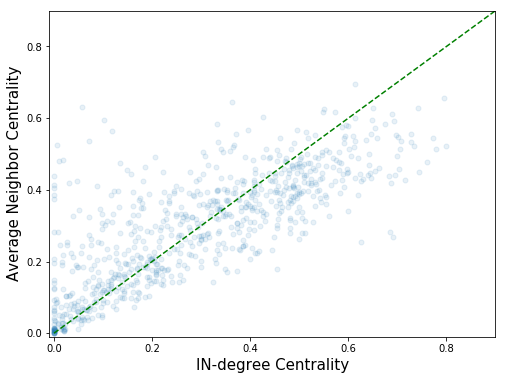

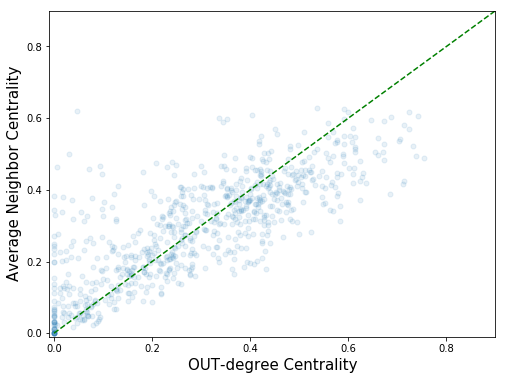

In [141]:
for kind in ['in','out']:  
    zone_cents= taz['{}_Centrality'.format(kind)].values
    neigh_cents= taz['ave_neigh_{}_cent'.format(kind)].values

    line_x = np.linspace(0,1,500)
    line = line_x

    plt.figure(figsize=(8,6))
    plt.plot(zone_cents,neigh_cents,'.',alpha=0.1,markersize=10)
    plt.plot(line_x,line, linestyle='--',color='g')
    plt.xlim(-0.01,0.9)
    plt.ylim(-0.01,0.9)
    plt.xlabel("{}-degree Centrality".format(kind.upper()), fontsize=15)
    plt.ylabel("Average Neighbor Centrality", fontsize=15)